In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Load the dataset 
df = pd.read_csv('city_day.csv')

# Drop unnecessary columns
df = df.drop(['City', 'Date', 'AQI_Bucket'], axis=1)

In [3]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [4]:
df_imputed.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [5]:
# Convert AQI values into categories 
bins = [0, 50, 100, 200, 300, 500,float('inf')]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy','Beyond AQI']
df_imputed['AQI_Category'] = pd.cut(df_imputed['AQI'], bins=bins, labels=labels, include_lowest=True)

In [6]:
df_imputed.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Category
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,Unhealthy for Sensitive Groups
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,Unhealthy for Sensitive Groups
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,Unhealthy for Sensitive Groups
3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,Unhealthy for Sensitive Groups
4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,Unhealthy for Sensitive Groups


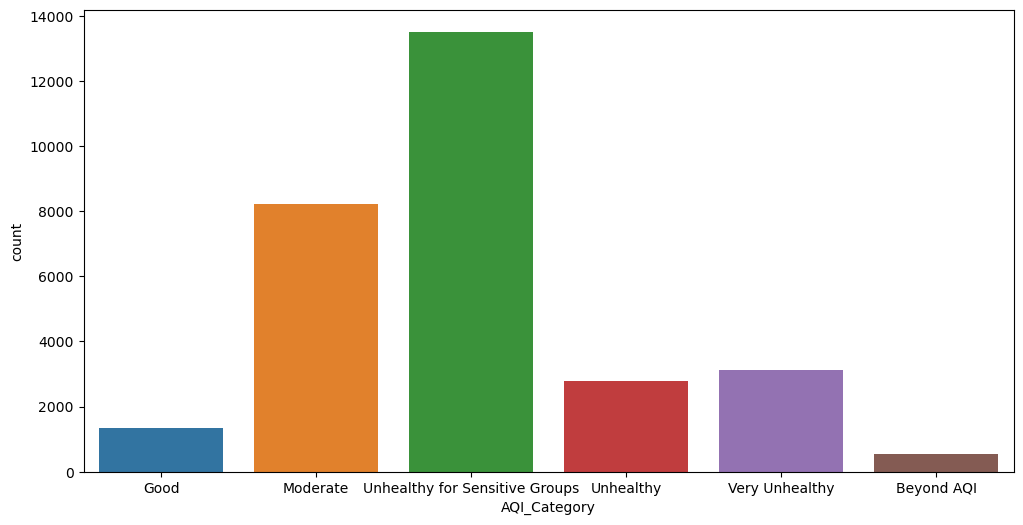

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(x = df_imputed['AQI_Category'])
plt.show()

In [8]:
# removing outliers
final_data  = df_imputed[df_imputed['AQI_Category'] != 'Beyond AQI']

In [9]:
# Split the data into features (X) and target variable (y)
X = final_data.drop(['AQI', 'AQI_Category'], axis=1)
y = final_data['AQI_Category']

In [10]:
# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [11]:
for i,j in zip(y, y_encoded):
    print("Category: ",i," Encoded value: ",j)


Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for

Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encode

Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy  Encoded value:  2
Category:  Unhealthy  Encoded value:  2
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded value:  1
Category:  Moderate  Encoded val

Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Moderate  Encoded value:  1
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Encoded value:  3
Category:  Unhealthy for Sensitive Groups  Enc

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

# Prediction on the training set
y_train_pred_rf = rf_classifier.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy_train_rf = round(accuracy_score(y_train, y_train_pred_rf), 3)
print(f'Accuracy (Random Forest) - Training Set: {accuracy_train_rf}')

# Prediction on the test set
y_test_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluation metrics on the test set
accuracy_test_rf = round(accuracy_score(y_test, y_test_pred_rf), 3)
print(f'Accuracy (Random Forest) - Test Set: {accuracy_test_rf}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))


Accuracy (Random Forest) - Training Set: 0.999
Accuracy (Random Forest) - Test Set: 0.826
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.65      0.72       257
           1       0.82      0.85      0.83      1728
           2       0.69      0.59      0.63       541
           3       0.85      0.87      0.86      2650
           4       0.86      0.88      0.87       622

    accuracy                           0.83      5798
   macro avg       0.80      0.77      0.78      5798
weighted avg       0.82      0.83      0.82      5798

Confusion Matrix:
[[ 166   80    0   11    0]
 [  36 1462    2  228    0]
 [   0    1  319  154   67]
 [   5  246   85 2294   20]
 [   0    0   58   14  550]]


Classification Report on Unseen Data:
              precision    recall  f1-score   support

           0       0.80      0.65      0.72       257
           1       0.82      0.85      0.83      1728
           2       0.69      0.59      0.63       541
           3       0.85      0.87      0.86      2650
           4       0.86      0.88      0.87       622

    accuracy                           0.83      5798
   macro avg       0.80      0.77      0.78      5798
weighted avg       0.82      0.83      0.82      5798



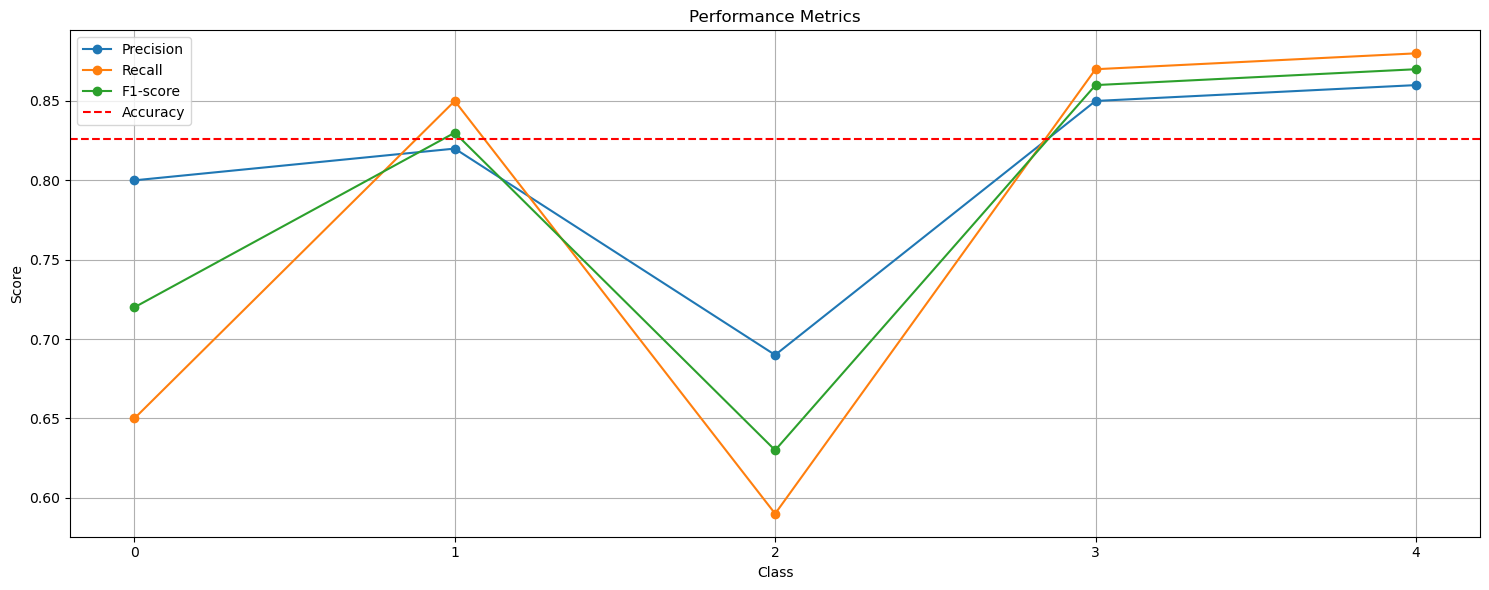

In [31]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming you have the classification report stored in a variable
class_report_unseen = classification_report(y_test, y_test_pred_rf)
print("Classification Report on Unseen Data:")
print(class_report_unseen)

# Parse the classification report
report_lines = class_report_unseen.split('\n')[2:-5]  # Exclude header and footer
precision = []
recall = []
f1_score = []
support = []
classes = []

for line in report_lines:
    data = line.split()
    if len(data) == 0:
        continue
    classes.append(data[0])
    precision.append(float(data[1]))
    recall.append(float(data[2]))
    f1_score.append(float(data[3]))
    support.append(int(data[4]))

# Compute accuracy
accuracy = accuracy_score(y_test, y_test_pred_rf)

# Plotting
plt.figure(figsize=(15, 6))

# Plot precision
plt.plot(classes, precision, label='Precision', marker='o')

# Plot recall
plt.plot(classes, recall, label='Recall', marker='o')

# Plot F1-score
plt.plot(classes, f1_score, label='F1-score', marker='o')

# Plot accuracy
plt.axhline(y=accuracy, color='r', linestyle='--', label='Accuracy')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.xticks()
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

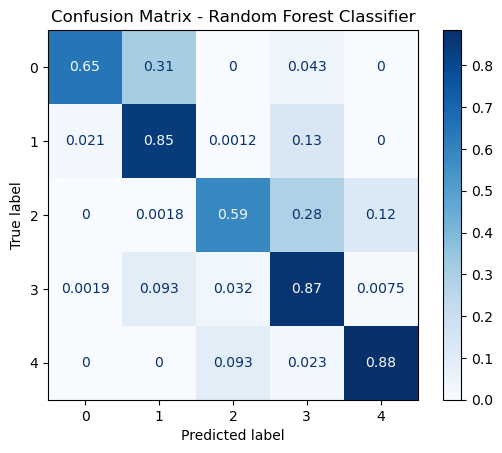

In [30]:
from sklearn.metrics import plot_confusion_matrix

# Define RandomForestClassifier with best hyperparameters
rf_classifier_best = RandomForestClassifier(random_state=42,)
rf_classifier_best.fit(X_train_scaled, y_train)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(rf_classifier_best, X_test_scaled, y_test, cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


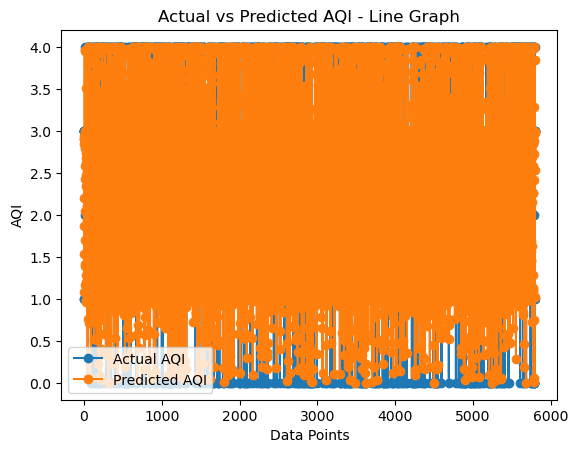

In [16]:
import matplotlib.pyplot as plt
import numpy as np


x_values = np.arange(len(y_test))  
actual_values = np.array(y_test)
predicted_values = np.array(y_test_pred_rf)

plt.plot(x_values, actual_values, label='Actual AQI', marker='o')
plt.plot(x_values, predicted_values, label='Predicted AQI', marker='o')


plt.xlabel('Data Points')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI - Line Graph')
plt.legend()  

# Show the plot
plt.show()


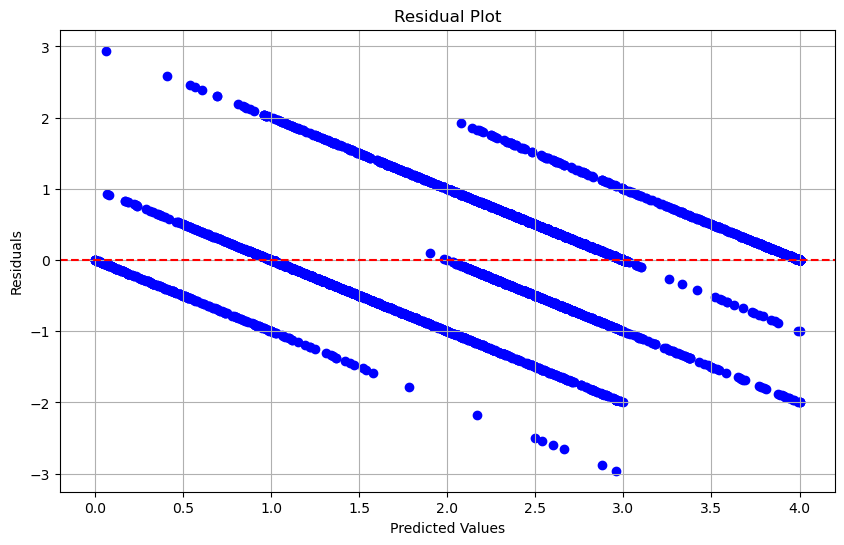

In [17]:
import matplotlib.pyplot as plt

# Calculating residuals
residuals = y_test - y_test_pred_rf

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_rf, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()
